# silhouette Score : 군집 평가
- 실루엣 계수를 통해 군집화의 품질을 평가할 수 있다.
- 실루엣 게수는 -1에서 1 사이의 값을 가짐
    - 1에 가까울수록 군집화가 잘됨 (다른 군집과 잘 분리되어 있음)
    - 0은 군집의 경계에 위치함
    - -1은 다른 군집과 겹치거나 잘못 분류된 경우

**주요 함수**
- silhouette_samples: 개별 데이터의 점수
- silhouette_score: 전체 데이터포인트의 평균값


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
import matplotlib.font_manager as fm

font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name() # 한글 폰트 이름 가져오기
matplotlib.rc('font', family=font) # 한글 폰트 사용 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 폰트 사용 설정

In [4]:
# 데이터로드
from sklearn.datasets import load_iris

iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df['species'] = iris_data.target

In [7]:
# Kmeans 군집화
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0)
kmeans.fit(iris_data.data) # X데이터 클러스터링 = 군집화
iris_df['cluster'] = kmeans.labels_
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [11]:
from sklearn.metrics import silhouette_samples, silhouette_score # 실루엣 계수 계산 → 군집화 평가하는 모델이기 때문에 metrics 에 있는 함수를 사용한다.

# sil_samples = silhouette_samples(iris_data.data, iris_df['cluster'])
sil_samples = silhouette_samples(iris_data.data, kmeans.labels_)
sil_samples.shape # sil_samples (150,) → 150개의 데이터에 대한 실루엣 계수

(150,)

In [14]:
sil_samples

array([ 0.85258191,  0.8149163 ,  0.82879659,  0.80435199,  0.84891774,
        0.7477614 ,  0.82109757,  0.8534934 ,  0.75127806,  0.82475199,
        0.80269525,  0.83540396,  0.80996716,  0.74535637,  0.70224038,
        0.64338856,  0.77526857,  0.85063272,  0.70636742,  0.81987458,
        0.78364122,  0.82546665,  0.79244412,  0.79345251,  0.77426479,
        0.79799564,  0.83296108,  0.84162136,  0.84325046,  0.81723402,
        0.8145665 ,  0.79849826,  0.76227879,  0.72184605,  0.82822866,
        0.83179477,  0.79374024,  0.84148042,  0.76779363,  0.84992603,
        0.84902387,  0.63767419,  0.78589195,  0.79963167,  0.74629437,
        0.80915172,  0.81295565,  0.81844011,  0.81783314,  0.85168255,
       -0.02672203,  0.36827154,  0.08489767,  0.59610609,  0.35669884,
        0.59416206,  0.27019063,  0.27245453,  0.32755642,  0.58167084,
        0.38107057,  0.58665651,  0.55085685,  0.47851679,  0.56757079,
        0.30479553,  0.5596951 ,  0.61137194,  0.46029717,  0.61

In [15]:
sil_samples.mean()

np.float64(0.551191604619592)

In [ ]:
# 전체 클러스터의 실루엣 계수 = 개별 데이터 포인트의 실루엣 계수 평균균
sil_score = silhouette_score(iris_data.data, kmeans.labels_)
sil_score # sil_score = sil_samples.mean()

0.551191604619592

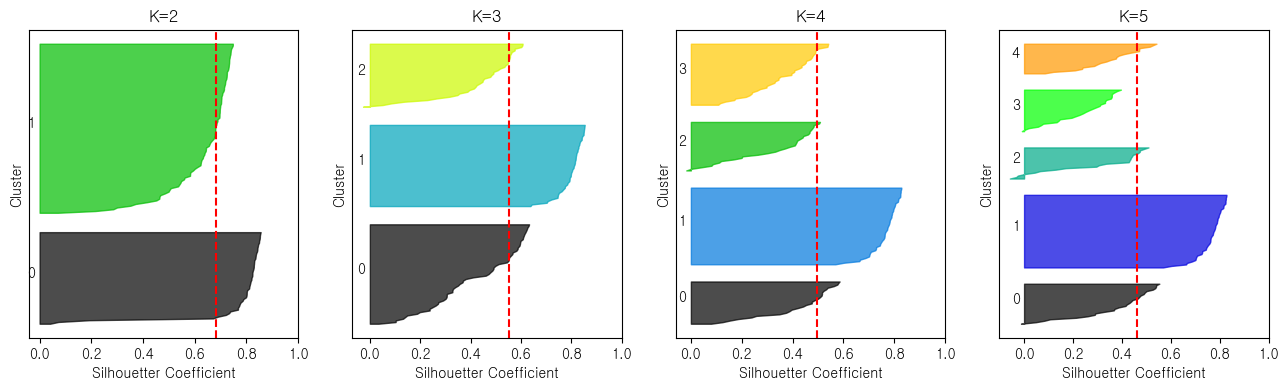

In [16]:
# k값(클러스터 개수)별 실루엣 계수 시각화
def visualize_silhouette(n_clusters, X):
    """
    :param n_clusters: [2, 3, 4, 5] 테스트할 k값 목록 
    :param X: 입력데이터
    :return: 
    """
    import matplotlib.cm as cm
    
    # k개수
    n_cols = len(n_clusters)
    # subplot 생성
    fig, axs = plt.subplots(1, n_cols, figsize=(4 * n_cols, 4))
    
    for index, k in enumerate(n_clusters):
        # 군집 
        kmeans = KMeans(n_clusters=k, random_state=0)
        labels = kmeans.fit_predict(X) # 중심점 계산 및 클러스터 결과 반환
        # 실루엣 계수
        sil_samples = silhouette_samples(X, labels)
        sil_score = silhouette_score(X, labels)
        
        # y축 범위
        y_lower = 10
        
        # plot 그리기
        for i in range(k): # range(2) = 0, 1  range(3) = 0, 1, 2
            ith_cluster_sil_samples = sil_samples[labels == i] # 이번 클러스터에 실루엣 계수 필터링
            ith_cluster_sil_samples.sort() # inplace 연산
            
            # 크기(영역) 계산
            ith_size = ith_cluster_sil_samples.shape[0]
            y_upper = y_lower + ith_size
            
            # 색상 지정
            color = cm.nipy_spectral(float(i) / k) # 클러스터 별 고유한 색상
            # print(color) # (r, g, b, a)
            axs[index].fill_betweenx(
                np.arange(y_lower, y_upper),    # y축 범위
                0,                              # x축1
                ith_cluster_sil_samples,        # x축2
                facecolor=color,                # 색상
                edgecolor=color,                # 테두리 색상
                alpha=0.7                       # 투명도
            )
            # 텍스트 추가
            axs[index].text(-0.05, y_lower + 0.5 * ith_size, str(i))

            y_lower = y_upper + 10 # 다음 차례의 아래경계 계산
        
        # 전체 실루엣 계수
        axs[index].axvline(x=sil_score, color='red', linestyle='--')
        
        # x, y축 라벨
        axs[index].set_xlabel('Silhouetter Coefficient')
        axs[index].set_ylabel('Cluster')
        
        # axis별 제목
        axs[index].set_title(f'K={k}')
        
        # x, y tick조정
        axs[index].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        axs[index].set_yticks([])

visualize_silhouette([2, 3, 4, 5], iris_data.data)   